In [6]:
!pip install --upgrade --no-no-cache-dir gdown
!gdown 1IAVxGMU83U3FWl5bgiSjuJMnKRTnaeRS


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-no-cache-dir
Downloading...
From (original): https://drive.google.com/uc?id=1IAVxGMU83U3FWl5bgiSjuJMnKRTnaeRS
From (redirected): https://drive.google.com/uc?id=1IAVxGMU83U3FWl5bgiSjuJMnKRTnaeRS&confirm=t&uuid=a93b73b0-095e-4e5b-9bd0-0d2d68796f75
To: /content/Fruits by YOLO.v1-fruits-detection.yolov9-20250206T142119Z-001.zip
100% 133M/133M [00:01<00:00, 93.2MB/s]


In [7]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [8]:
import zipfile
import os

def extract_zip(zip_filepath, extract_to):
    """Extract a ZIP file to a specified directory."""
    try:
        with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
            print(f"Extracted all files to {extract_to}")
    except FileNotFoundError:
        print(f"The file {zip_filepath} does not exist.")
    except zipfile.BadZipFile:
        print(f"The file {zip_filepath} is not a zip file or it is corrupted.")
    except Exception as e:
        print(f"An error occurred: {e}")

zip_file_path = '/content/Fruits by YOLO.v1-fruits-detection.yolov9-20250206T142119Z-001.zip'
output_directory = '/content/'

os.makedirs(output_directory, exist_ok=True)

extract_zip(zip_file_path, output_directory)

Extracted all files to /content/


In [9]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import cv2
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [16]:
!ls -la "/content/Fruits by YOLO.v1-fruits-detection.yolov9/"

total 24
drwxr-xr-x 5 root root 4096 Feb  6 14:32 .
drwxr-xr-x 1 root root 4096 Feb  6 14:33 ..
-rw-r--r-- 1 root root  519 Feb  6 14:32 data.yaml
drwxr-xr-x 4 root root 4096 Feb  6 14:32 test
drwxr-xr-x 4 root root 4096 Feb  6 14:32 train
drwxr-xr-x 4 root root 4096 Feb  6 14:32 valid


In [22]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import torch
from ultralytics import YOLO
import yaml

torch.cuda.empty_cache()

if torch.cuda.is_available():
    print("CUDA is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")

data_yaml_path = '/content/Fruits by YOLO.v1-fruits-detection.yolov9/data.yaml'

with open(data_yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

data_config['train'] = '/content/Fruits by YOLO.v1-fruits-detection.yolov9/train'
data_config['val']   = '/content/Fruits by YOLO.v1-fruits-detection.yolov9/valid'
if 'test' in data_config:
    data_config['test'] = '/content/Fruits by YOLO.v1-fruits-detection.yolov9/test'

with open(data_yaml_path, 'w') as f:
    yaml.dump(data_config, f)

print("Updated data.yaml configuration:", data_config)

model = YOLO('/content/yolov9e.pt')

model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,  
    device=0
)

metrics_val = model.val(
    data=data_yaml_path,
    split='val'
)
print("Validation Metrics:", metrics_val)

metrics_test = model.val(
    data=data_yaml_path,
    split='test'
)
print("Test Metrics:", metrics_test)

CUDA is available. Using GPU: NVIDIA A100-SXM4-40GB
Updated data.yaml configuration: {'names': ['Apple', 'Banana', 'Grapes', 'Kiwi', 'Mango', 'Orange', 'Pineapple', 'Sugerapple', 'Watermelon'], 'nc': 9, 'roboflow': {'license': 'CC BY 4.0', 'project': 'fruits-by-yolo', 'url': 'https://universe.roboflow.com/fruitsdetection/fruits-by-yolo/dataset/1', 'version': 1, 'workspace': 'fruitsdetection'}, 'test': '/content/Fruits by YOLO.v1-fruits-detection.yolov9/test', 'train': '/content/Fruits by YOLO.v1-fruits-detection.yolov9/train', 'val': '/content/Fruits by YOLO.v1-fruits-detection.yolov9/valid'}
Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov9e.pt, data=/content/Fruits by YOLO.v1-fruits-detection.yolov9/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train8, exist_ok=False, pretraine

train: Scanning /content/Fruits by YOLO.v1-fruits-detection.yolov9/train/labels.cache... 2698 images, 41 backgrounds, 0 corrupt: 100%|██████████| 2733/2733 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Fruits by YOLO.v1-fruits-detection.yolov9/train/images/Image_68_jpg.rf.997cacc450580384ef43a41e4a1eb810.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5750, len(boxes) = 5753. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Fruits by YOLO.v1-fruits-detection.yolov9/valid/labels.cache... 187 images, 17 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 390, len(boxes) = 394. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      36.3G     0.9803      2.143        1.5         53        640: 100%|██████████| 171/171 [01:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        203        394      0.288      0.287      0.173      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        34G      1.125       1.85      1.624         53        640: 100%|██████████| 171/171 [01:12<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]


                   all        203        394      0.216      0.179     0.0845     0.0524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      33.9G      1.167      1.844      1.649         48        640: 100%|██████████| 171/171 [01:10<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        203        394      0.342      0.315      0.225      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      33.9G        1.1      1.704      1.589         36        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        203        394      0.472       0.51      0.449      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      33.9G      1.047      1.587      1.542         52        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        203        394      0.458      0.489      0.481      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      33.8G      1.017      1.484      1.527         65        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        203        394      0.517      0.602      0.562      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      33.9G     0.9819      1.424      1.496         53        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        203        394      0.633      0.536      0.602      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      33.9G     0.9524      1.334      1.472         70        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        203        394      0.537      0.528      0.541      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      33.9G     0.9228      1.261      1.447         60        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        203        394      0.563      0.678      0.621      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        34G     0.8977      1.225      1.437         54        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        203        394      0.549      0.628      0.589      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      33.9G     0.8841      1.173      1.431         60        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        203        394      0.562      0.627      0.605      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      34.6G     0.8696      1.148      1.405         80        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]

                   all        203        394      0.576       0.67      0.656      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      34.4G     0.8648      1.108      1.398         39        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        203        394      0.596      0.707      0.676      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      33.8G     0.8448      1.074      1.386         58        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        203        394      0.623      0.636      0.662       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      33.9G     0.8329      1.036      1.382         65        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        203        394      0.555      0.708      0.655      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        34G     0.8193      1.004      1.374         47        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]

                   all        203        394      0.688      0.655      0.695      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      34.1G     0.8186     0.9873      1.373         43        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        203        394      0.651      0.705      0.683       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        34G     0.8122     0.9578      1.359         70        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394      0.648      0.709      0.696      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      33.8G     0.8006     0.9222      1.348         41        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394      0.608      0.748      0.703      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      33.9G       0.79     0.9169      1.344         51        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        203        394      0.691       0.68      0.717      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      33.9G     0.7859     0.9092      1.344         76        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        203        394      0.644      0.686      0.703      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      33.8G     0.7673     0.8815      1.322         55        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        203        394      0.613      0.694      0.665      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      33.9G      0.753     0.8657      1.315         51        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394      0.607      0.678      0.678      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      33.9G     0.7583     0.8274       1.31         41        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]

                   all        203        394      0.667      0.667      0.711      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      33.9G     0.7494     0.8204      1.309         54        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        203        394      0.681      0.636       0.69       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      33.8G     0.7441     0.8128      1.303         43        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]

                   all        203        394      0.602      0.672      0.688       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      33.9G     0.7345      0.789      1.292         43        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        203        394      0.621        0.7      0.696      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      33.9G       0.72     0.7596      1.278         41        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        203        394      0.679      0.671      0.702       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      33.9G     0.7237     0.7556      1.282         68        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        203        394      0.638      0.676      0.705      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      33.8G     0.7279     0.7516      1.282         58        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        203        394      0.655      0.633      0.669       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        34G      0.705     0.7246      1.273         38        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394      0.653      0.714      0.692      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      33.9G     0.6966     0.7142      1.263         63        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        203        394      0.707       0.69       0.71      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        34G     0.6968     0.6991      1.261         63        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        203        394      0.636      0.655      0.676      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      33.8G     0.6871     0.6663      1.245         46        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        203        394      0.658      0.723      0.716      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        34G     0.6811     0.6579      1.245         57        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        203        394      0.673      0.669      0.697       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      33.9G     0.6746     0.6411      1.241         52        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        203        394      0.686      0.672      0.699      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      33.9G     0.6537     0.6351      1.223         52        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        203        394      0.692      0.678      0.719      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      33.8G     0.6505     0.6167      1.224         66        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394      0.731      0.689      0.711      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      33.9G     0.6466     0.5891      1.212         47        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394      0.702      0.713      0.719      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      33.9G     0.6356     0.5808      1.214         49        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        203        394      0.715      0.673      0.724      0.583


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      33.9G     0.5319     0.4955      1.151         26        640: 100%|██████████| 171/171 [01:10<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394       0.69      0.668      0.695      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      33.8G     0.5255     0.4507      1.131         26        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        203        394      0.734      0.659      0.709      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        34G     0.5148     0.4306      1.133         35        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        203        394      0.697      0.669      0.703      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      33.9G     0.4998      0.426       1.11         42        640: 100%|██████████| 171/171 [01:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        203        394      0.703      0.703      0.705      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      33.9G     0.4882     0.3983      1.101         28        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        203        394      0.695      0.716      0.701      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      33.8G     0.4819      0.386      1.093         26        640: 100%|██████████| 171/171 [01:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        203        394      0.682      0.724      0.707      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      33.9G     0.4777     0.3671      1.094         41        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        203        394      0.724      0.703      0.719      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      33.9G     0.4649     0.3534      1.077         31        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        203        394       0.69      0.725      0.718      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      33.9G     0.4626     0.3424      1.082         31        640: 100%|██████████| 171/171 [01:10<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        203        394       0.71      0.715      0.716      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        34G      0.449     0.3274       1.07         23        640: 100%|██████████| 171/171 [01:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        203        394      0.679      0.743      0.714      0.578



50 epochs completed in 1.049 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 117.3MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv9e summary (fused): 687 layers, 57,383,339 parameters, 0 gradients, 189.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


                   all        203        394       0.69      0.723      0.719      0.588
                 Apple         16         20      0.786       0.95      0.936      0.863
                Banana         27         65      0.693      0.446      0.583       0.37
                Grapes         25         39      0.641      0.504      0.533      0.478
                  Kiwi         21         55      0.602      0.782      0.705      0.598
                 Mango         15         29      0.679      0.802      0.795      0.617
                Orange         26         70      0.721      0.701      0.737      0.655
             Pineapple         30         57      0.647      0.738      0.695      0.511
            Sugerapple          4          6      0.791      0.833       0.81      0.661
            Watermelon         22         53      0.653      0.747      0.676      0.542
Speed: 0.1ms preprocess, 6.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect

val: Scanning /content/Fruits by YOLO.v1-fruits-detection.yolov9/valid/labels.cache... 187 images, 17 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 390, len(boxes) = 394. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]


                   all        203        394       0.69      0.725      0.718      0.588
                 Apple         16         20      0.785       0.95      0.935      0.862
                Banana         27         65       0.69      0.446      0.582       0.37
                Grapes         25         39      0.642      0.506       0.53      0.475
                  Kiwi         21         55      0.601      0.782      0.701      0.594
                 Mango         15         29       0.68      0.807      0.794      0.617
                Orange         26         70      0.724      0.714      0.736      0.656
             Pineapple         30         57      0.647      0.739      0.696      0.514
            Sugerapple          4          6      0.788      0.833       0.81      0.661
            Watermelon         22         53      0.654      0.749      0.678       0.54
Speed: 0.2ms preprocess, 10.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detec

val: Scanning /content/Fruits by YOLO.v1-fruits-detection.yolov9/test/labels... 90 images, 1 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1034.60it/s]

val: New cache created: /content/Fruits by YOLO.v1-fruits-detection.yolov9/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]


                   all         90        215       0.77      0.711      0.782       0.65
                 Apple         11         11          1      0.858      0.995      0.916
                Banana         12         50      0.762      0.193      0.349      0.232
                Grapes         14         17      0.881      0.882      0.931      0.726
                  Kiwi         13         28       0.54       0.75      0.671      0.543
                 Mango          3         10      0.857        0.9      0.972      0.937
                Orange         15         53      0.632      0.717      0.739      0.682
             Pineapple         15         30      0.872        0.7      0.824      0.567
            Watermelon          6         16      0.616      0.688      0.777      0.596
Speed: 1.0ms preprocess, 13.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train83
Test Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_

CUDA is available. Using GPU: NVIDIA A100-SXM4-40GB
Randomly selected image: /content/Fruits by YOLO.v1-fruits-detection.yolov9/test/images/images-2023-02-07T154739-417_jpeg.rf.f0c595a19023c9c14f26e447dcbf1023.jpg

image 1/1 /content/Fruits by YOLO.v1-fruits-detection.yolov9/test/images/images-2023-02-07T154739-417_jpeg.rf.f0c595a19023c9c14f26e447dcbf1023.jpg: 640x640 1 orange, 30.1ms
Speed: 2.1ms preprocess, 30.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Predicted classes: [49]


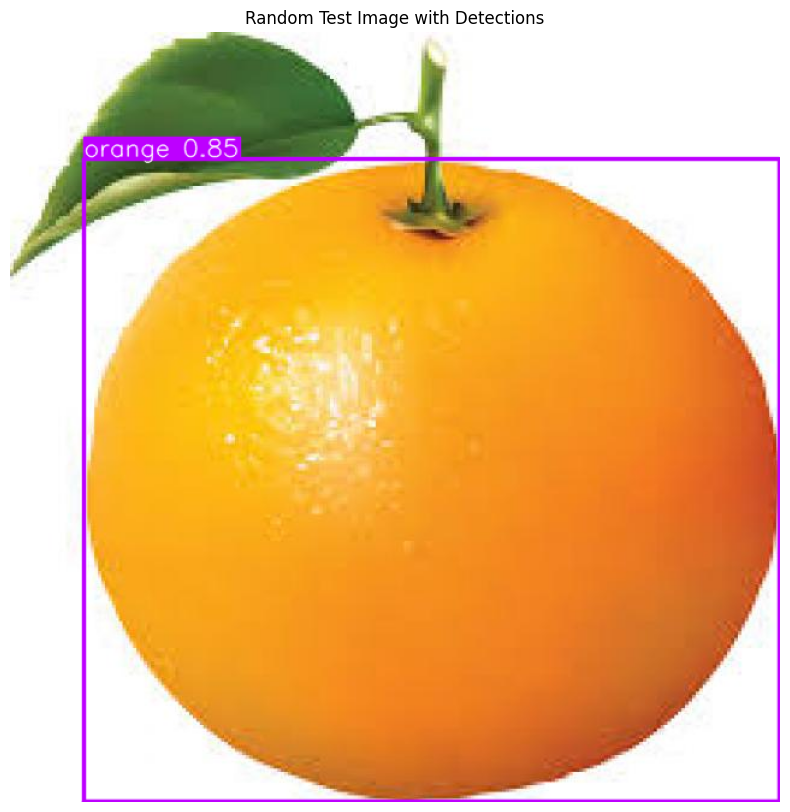

In [36]:
import os
import random
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob


if torch.cuda.is_available():
    print("CUDA is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")

model = YOLO('/content/yolov9e.pt')

test_dir = '/content/Fruits by YOLO.v1-fruits-detection.yolov9/test/images'

test_images = glob.glob(os.path.join(test_dir, '*.*'))
if not test_images:
    raise ValueError("No images found in the test directory.")

random_image_path = random.choice(test_images)
print("Randomly selected image:", random_image_path)

results = model.predict(source=random_image_path, conf=0.25)
result = results[0]

annotated_img = result.plot()  

if result.boxes is not None and len(result.boxes) > 0:
    pred_classes = result.boxes.cls.cpu().numpy().astype(int)
    print("Predicted classes:", pred_classes)
else:
    print("No detections found.")

annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(annotated_img_rgb)
plt.title("Random Test Image with Detections")
plt.axis("off")
plt.show()